# Imports

In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.encoding import StringSimilarityEncoder

# Load and preprocess data

In [4]:
# Helper function for loading and preprocessing data
def load_titanic(filepath='titanic.csv'):
    translate_table = str.maketrans('' , '', string.punctuation)
    # data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
    data = pd.read_csv(filepath)
    data = data.replace('?', np.nan)
    # data['home.dest'] = (
    #     data['home.dest']
    #     .str.strip()
    #     .str.translate(translate_table)
    #     .str.replace('  ', ' ')
    #     .str.lower()
    # )
    data['name'] = (
        data['name']
        .str.strip()
        .str.translate(translate_table)
        .str.replace('  ', ' ')
        .str.lower()
    )
    data['ticket'] = (
        data['ticket']
        .str.strip()
        .str.translate(translate_table)
        .str.replace('  ', ' ')
        .str.lower()
    )
    return data

In [5]:
# data = load_titanic("../data/titanic.csv")
data = load_titanic("../data/titanic-2/Titanic-Dataset.csv")
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,braund mr owen harris,male,22.0,1,0,a5 21171,7.2500,NaN,S
1,2,1,1,cumings mrs john bradley florence briggs thayer,female,38.0,1,0,pc 17599,71.2833,C85,C
2,3,1,3,heikkinen miss laina,female,26.0,0,0,stono2 3101282,7.9250,NaN,S
3,4,1,1,futrelle mrs jacques heath lily may peel,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,allen mr william henry,male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Separate into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['survived', 'sex', 'cabin', 'embarked'], axis=1),
    data['survived'],
    test_size=0.3,
    random_state=0
)

# StringSimilarityEncoder

In [9]:
# set up the encoder
# encoder = StringSimilarityEncoder(top_categories=2, variables=['name', 'home.dest', 'ticket'])
encoder = StringSimilarityEncoder(top_categories=2, variables=['name', 'ticket'])

In [10]:
# fit the encoder
encoder.fit(X_train)

StringSimilarityEncoder(top_categories=2, variables=['name', 'ticket'])

In [11]:
# lets see what categories we will be comparing to others
encoder.encoder_dict_

{'name': ['daly mr peter denis', 'dimic mr jovan'],
 'ticket': ['ca 2343', '347082']}

In [12]:
# transform the data
train_t = encoder.transform(X_train)
test_t = encoder.transform(X_test)

In [13]:
# check output
train_t.head(5)

,passengerid,pclass,age,sibsp,parch,fare,name_daly mr peter denis,name_dimic mr jovan,ticket_ca 2343,ticket_347082
857,858,1,51.0,0,0,26.5500,1.000000,0.484848,0.153846,0.333333
52,53,1,49.0,1,0,76.7292,0.581818,0.280000,0.400000,0.285714
386,387,3,1.0,5,2,46.9000,0.750000,0.465116,0.714286,0.307692
124,125,1,54.0,0,1,77.2875,0.727273,0.564103,0.333333,0.545455
578,579,3,NaN,1,0,14.4583,0.553191,0.523810,0.181818,0.400000


In [14]:
# check output
test_t.head(5)

,passengerid,pclass,age,sibsp,parch,fare,name_daly mr peter denis,name_dimic mr jovan,ticket_ca 2343,ticket_347082
495,496,3,NaN,0,0,14.4583,0.526316,0.363636,0.181818,0.400000
648,649,3,NaN,0,0,7.5500,0.742857,0.466667,0.133333,0.142857
278,279,3,7.0,4,1,29.1250,0.685714,0.533333,0.307692,0.500000
31,32,1,NaN,1,0,146.5208,0.524590,0.357143,0.266667,0.142857
255,256,3,29.0,0,2,15.2458,0.555556,0.448980,0.181818,0.400000


<Axes: title={'center': 'Ticket encoding in test'}, xlabel='ticket_ca 2343', ylabel='ticket_347082'>

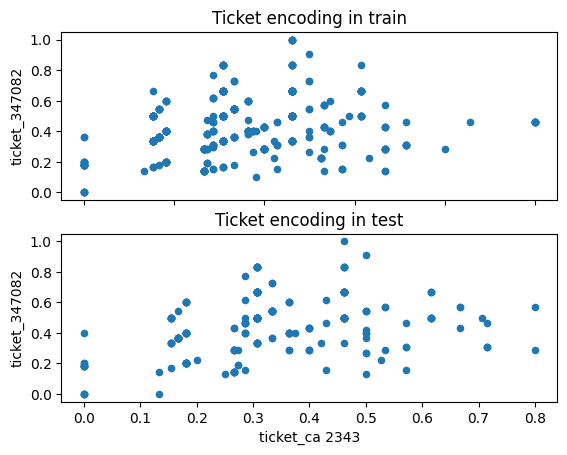

In [17]:
# plot encoded column - ticket
# OHE could produce only 0, but SSE produces values in [0,1] range
fig, ax = plt.subplots(2, 1)
# train_t.plot(kind='scatter', x='ticket_ca 2343', y='ticket_ca 2144', sharex=True, title='Ticket encoding in train', ax=ax[0])
train_t.plot(kind='scatter', x='ticket_ca 2343', y='ticket_347082', sharex=True, title='Ticket encoding in train', ax=ax[0])
# test_t.plot(kind='scatter', x='ticket_ca 2343', y='ticket_ca 2144', sharex=True, title='Ticket encoding in test', ax=ax[1])
test_t.plot(kind='scatter', x='ticket_ca 2343', y='ticket_347082', sharex=True, title='Ticket encoding in test', ax=ax[1])

In [20]:
# defining encoder that ignores NaNs
encoder = StringSimilarityEncoder(
    top_categories=2,
    missing_values='ignore',
    # variables=['name', 'home.dest', 'ticket']
    variables=['name', 'ticket']
)

In [21]:
# refiting the encoder
encoder.fit(X_train)

StringSimilarityEncoder(missing_values='ignore', top_categories=2,
                        variables=['name', 'ticket'])

In [22]:
# lets see what categories we will be comparing to others
# note - no empty strings with handle_missing='ignore'
encoder.encoder_dict_

{'name': ['daly mr peter denis', 'dimic mr jovan'],
 'ticket': ['ca 2343', '347082']}

In [23]:
# transform the data
train_t = encoder.transform(X_train)
test_t = encoder.transform(X_test)

In [24]:
# check output
train_t.head(5)

,passengerid,pclass,age,sibsp,parch,fare,name_daly mr peter denis,name_dimic mr jovan,ticket_ca 2343,ticket_347082
857,858,1,51.0,0,0,26.5500,1.000000,0.484848,0.153846,0.333333
52,53,1,49.0,1,0,76.7292,0.581818,0.280000,0.400000,0.285714
386,387,3,1.0,5,2,46.9000,0.750000,0.465116,0.714286,0.307692
124,125,1,54.0,0,1,77.2875,0.727273,0.564103,0.333333,0.545455
578,579,3,NaN,1,0,14.4583,0.553191,0.523810,0.181818,0.400000


In [25]:
# check output
test_t.head(5)

,passengerid,pclass,age,sibsp,parch,fare,name_daly mr peter denis,name_dimic mr jovan,ticket_ca 2343,ticket_347082
495,496,3,NaN,0,0,14.4583,0.526316,0.363636,0.181818,0.400000
648,649,3,NaN,0,0,7.5500,0.742857,0.466667,0.133333,0.142857
278,279,3,7.0,4,1,29.1250,0.685714,0.533333,0.307692,0.500000
31,32,1,NaN,1,0,146.5208,0.524590,0.357143,0.266667,0.142857
255,256,3,29.0,0,2,15.2458,0.555556,0.448980,0.181818,0.400000


KeyError: 'home.dest_new york ny'

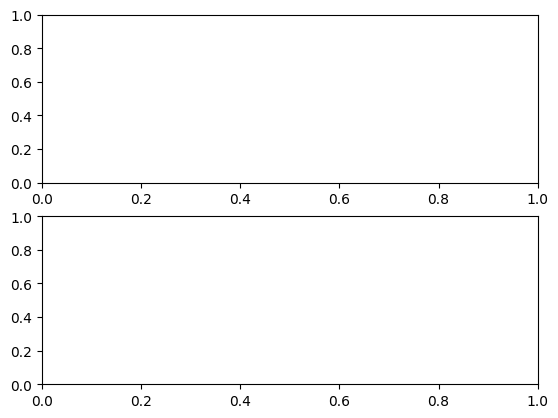

In [26]:
# plot encoded column - home.dest
fig, ax = plt.subplots(2, 1);
train_t.plot(
    kind='scatter',
    x='home.dest_new york ny',
    y='home.dest_london',
    sharex=True,
    title='Home destination encoding in train',
    ax=ax[0]
);
test_t.plot(
    kind='scatter',
    x='home.dest_new york ny',
    y='home.dest_london',
    sharex=True,
    title='Home destination encoding in test',
    ax=ax[1]
);

# Note on dimensionality reduction

In [19]:
# These encoded columns could also be compressed further to reduce dimensions
# since they are not boolean, but real numbers
from sklearn.decomposition import PCA

In [20]:
# defining encoder for home destination
encoder = StringSimilarityEncoder(
    top_categories=None,
    handle_missing='impute',
    variables=['home.dest']
)

In [21]:
# refiting the encoder
encoder.fit(X_train)

StringSimilarityEncoder(variables=['home.dest'])

In [22]:
# transform the data
train_t = encoder.transform(X_train)

In [23]:
# check the shape (should be pretty big)
train_t.shape

(916, 295)

In [24]:
# take home.dest encoded columns
home_encoded = train_t.filter(like='home.dest')

In [25]:
# defining PCA for compression
pca = PCA(n_components=0.9)

In [26]:
# train PCA
pca.fit(home_encoded)

PCA(n_components=0.9)

In [27]:
# transform train and test datasets
train_compressed = pca.transform(home_encoded)

In [28]:
# check compressed shape (should be way smaller)
train_compressed.shape

(916, 1)